Group:
- Amir Ali Akhgari
- Ali Janloo
- Ali Alavizadeh

Adadelta is an optimization algorithm used for training machine learning models, particularly in the context of deep learning. It is an extension of the Adagrad algorithm, aimed at improving its performance by addressing some of its limitations, particularly the aggressive and monotonically decreasing learning rates.

Here’s a concise explanation of how Adadelta works:

1. **Running Averages of Squared Gradients**: Like Adagrad, Adadelta keeps track of the sum of squared gradients. However, instead of accumulating all past squared gradients, Adadelta uses a decaying average to maintain only a window of past gradients. This is controlled by a decay rate parameter $\rho$, typically set to a value close to 1 (e.g., 0.95).

    $$
    E[g^2]_t = \rho E[g^2]_{t-1} + (1 - \rho) g_t^2
    $$

    Here, $E[g^2]_t$ is the decayed average of past squared gradients, and $g_t$ is the gradient at time step $t$.

2. **Adaptive Learning Rate**: Adadelta adapts the learning rate based on the moving average of squared gradients. It scales the gradients by a factor derived from the moving average, ensuring the learning rate adjusts dynamically to the scale of the gradients:

    $$
    \Delta x_t = - \frac{\sqrt{E[\Delta x^2]_{t-1} + \epsilon}}{\sqrt{E[g^2]_t + \epsilon}} g_t
    $$

    Here, $\Delta x_t$ is the parameter update at time step $t$, $E[\Delta x^2]_{t-1}$ is the decaying average of past squared parameter updates, and $\epsilon$ is a small constant (typically $10^{-6}$) to prevent division by zero.

3. **Updating Parameters**: The parameters are then updated using the computed $\Delta x_t$:

    $$
    x_{t+1} = x_t + \Delta x_t
    $$

4. **Running Averages of Squared Updates**: To keep the method consistent, Adadelta also maintains a decaying average of the squared updates to the parameters:

    $$
    E[\Delta x^2]_t = \rho E[\Delta x^2]_{t-1} + (1 - \rho) \Delta x_t^2
    $$

By dynamically adjusting the learning rate and using a decaying average of past gradients, Adadelta overcomes the diminishing learning rate problem in Adagrad and provides a more robust approach to training deep learning models. It doesn’t require a manually set learning rate, as it adapts the step size based on the data, making it particularly useful in scenarios where the learning rate needs to be finely tuned.

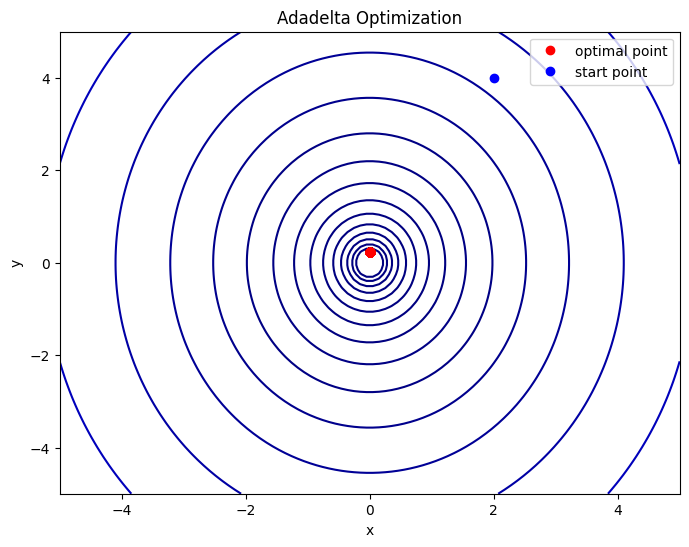

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class AdadeltaOptimizer:
    def __init__(self, params, lr=1.0, rho=0.95, epsilon=1e-6):
        self.params = params
        self.lr = lr
        self.rho = rho
        self.epsilon = epsilon
        
        # Initialize accumulators for squared gradients and updates
        self.E_g2 = [np.zeros_like(param) for param in params]
        self.E_dx2 = [np.zeros_like(param) for param in params]
    
    def update(self, grads):
        updates = []
        for i, (param, grad) in enumerate(zip(self.params, grads)):
            # Update the running average of squared gradients
            self.E_g2[i] = self.rho * self.E_g2[i] + (1 - self.rho) * grad**2
            
            # Compute update
            rms_dx = np.sqrt(self.E_dx2[i] + self.epsilon)
            rms_g = np.sqrt(self.E_g2[i] + self.epsilon)
            delta_x = - (rms_dx / rms_g) * grad
            
            # Update the running average of squared updates
            self.E_dx2[i] = self.rho * self.E_dx2[i] + (1 - self.rho) * delta_x**2
            
            # Apply update
            param += self.lr * delta_x
            updates.append(param)
        
        return updates

def quadratic_cost_function(x, y):
    return 2*x**2 + y**2

def quadratic_gradients(x, y):
    return np.array([4*x, 2*y])

# Initialize parameters
params = [np.array(2.0), np.array(4.0)]  # Starting point

# Adadelta optimizer
optimizer = AdadeltaOptimizer(params)

# Lists to store parameter updates for visualization
param_history = [params.copy()]

# Perform optimization
for _ in range(1000):
    grads = quadratic_gradients(params[0], params[1])
    updated_params = optimizer.update(grads)
    params = updated_params  # Update the params with the new values
    param_history.append(updated_params.copy())

# Convert history to numpy array for plotting
param_history = np.array(param_history)
    
# Plotting
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = quadratic_cost_function(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='jet')
plt.plot(param_history[:, 0], param_history[:, 1], 'o', color='red', label='optimal point')
plt.plot(2.0, 4.0, 'o', color='blue', label="start point")
plt.title('Adadelta Optimization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
